/home/mikyge2/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Depth: 1, Accuracy: 0.7111, Precision: 0.5000, Recall: 0.6667, F1-Score: 0.5556
Depth: 2, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Depth: 3, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Depth: 4, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Depth: 5, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Depth: 6, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Depth: 7, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Depth: 8, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Depth: 9, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Depth: 10, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Depth: 11, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Depth: 12, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Depth: 13, Accuracy: 1.0000, Precisio

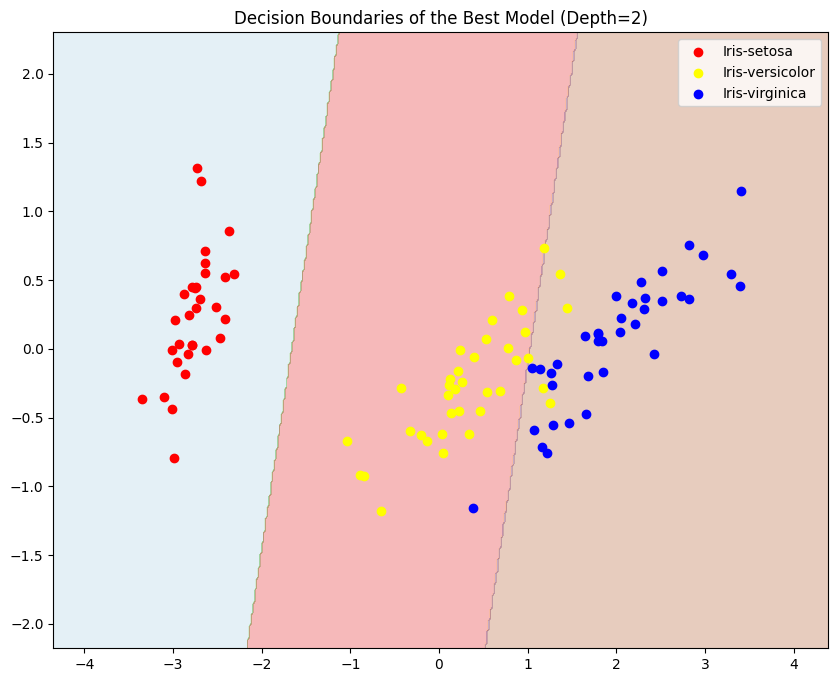

<Figure size 800x600 with 0 Axes>

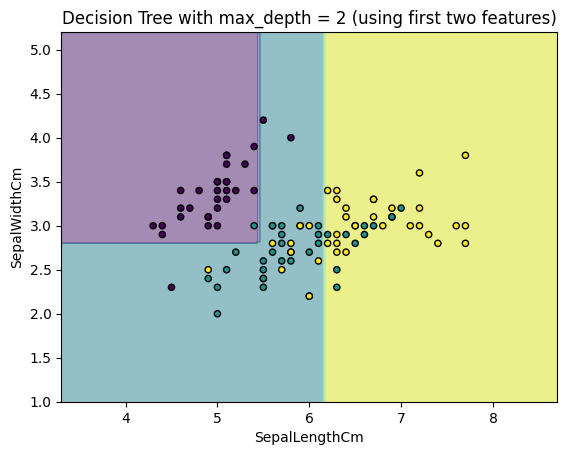

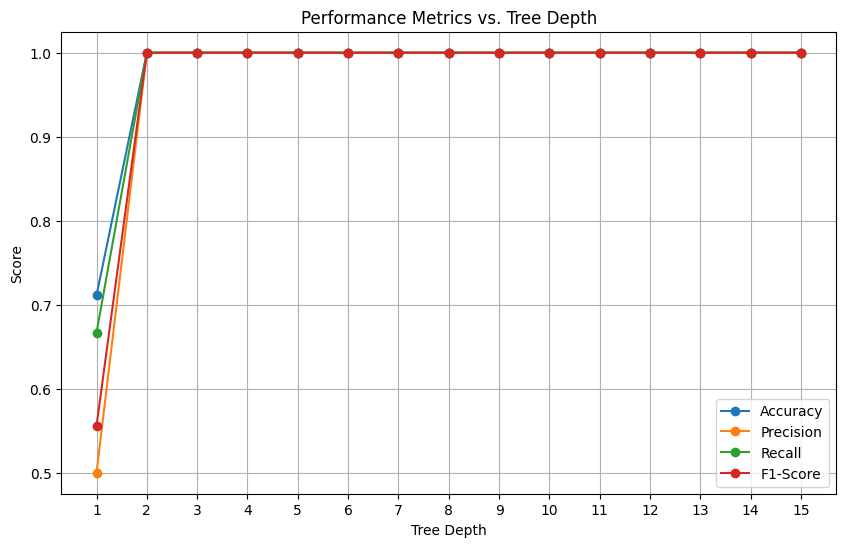

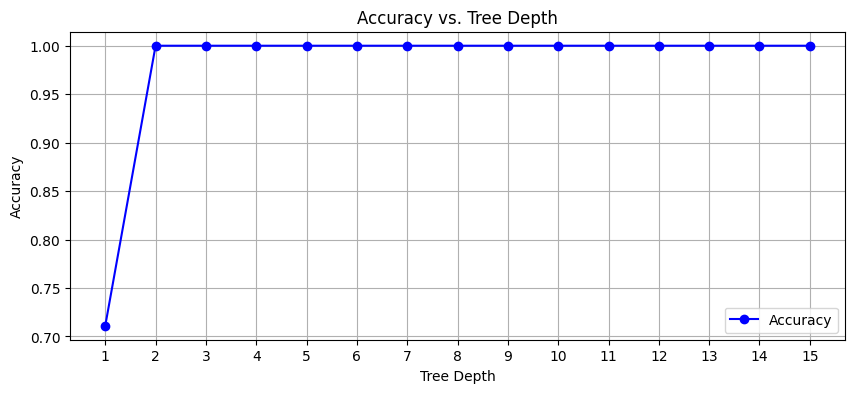

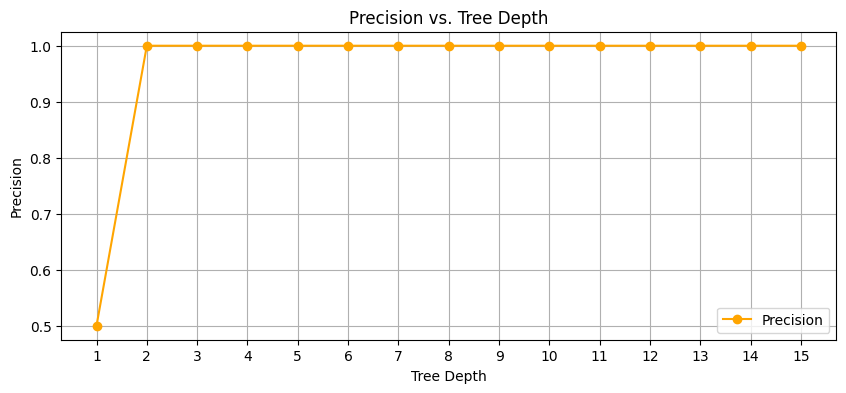

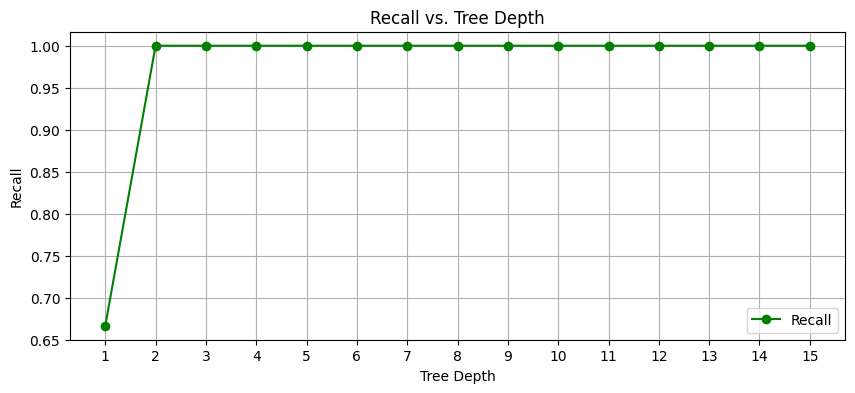

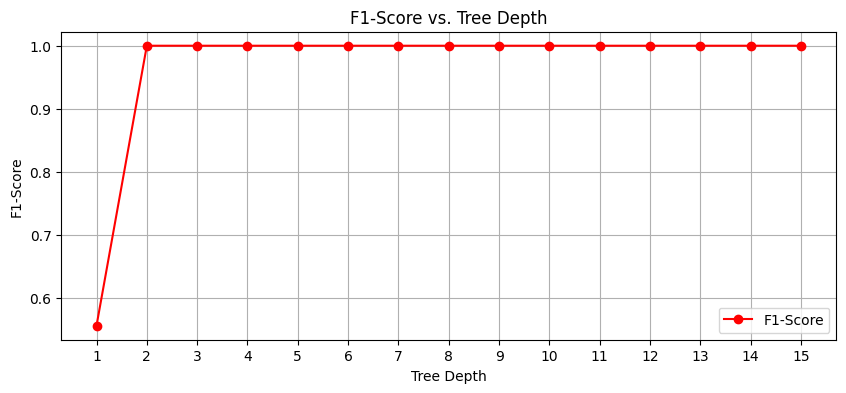

In [2]:
# Import necessary libraries
import pandas as pd  # Import for data manipulation and analysis
import numpy as np  # Import for numerical operations
import matplotlib.pyplot as plt  # Import for plotting
from sklearn.model_selection import train_test_split  # Import for data splitting
from sklearn.tree import DecisionTreeClassifier  # Import for building decision trees
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Import for model evaluation
from sklearn.inspection import DecisionBoundaryDisplay  # Import for plotting decision boundaries
from sklearn.preprocessing import LabelEncoder  # Import for encoding categorical labels
from sklearn.decomposition import PCA  # Import for Principal Component Analysis

# Load the dataset
file_path = './Iris.csv'  # Path to the dataset file
df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

# Separate features (X) and labels (y)
X = df.iloc[:, 1:-1].values  # Extract feature columns: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
y = df.iloc[:, -1].values  # Extract label column: Iris species

# Convert class labels to numerical values (e.g., 'Iris-setosa' to 0, 'Iris-versicolor' to 1, 'Iris-virginica' to 2)
label_encoder = LabelEncoder()  # Initialize LabelEncoder
y = label_encoder.fit_transform(y)  # Encode class labels as numerical values

# Split the dataset into training and testing sets (INSTRUCTION #1: Split the dataset into training and testing sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Split dataset as training 70% and testing 30%

# Initialize variables to store performance metrics for different tree depths
depths = range(1, 16)  # Define range of tree depths to evaluate
accuracies = []  # List to store accuracy scores for each depth
precisions = []  # List to store precision scores for each depth
recalls = []  # List to store recall scores for each depth
f1_scores = []  # List to store F1 scores for each depth

# Evaluate Decision Tree performance for various depths (INSTRUCTION #2: Train a decision tree with various maximum depths)
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)  # Initialize DecisionTreeClassifier with current depth
    
    # Train the model
    clf.fit(X_train, y_train)  # Fit the model on the training data
    
    # Make predictions
    y_pred = clf.predict(X_test)  # Predict labels for the test set
    
    # Calculate metrics (INSTRUCTION #3: Evaluate the performance of each model using accuracy, precision, recall, and F1-score)
    accuracies.append(accuracy_score(y_test, y_pred))  # Compute and store accuracy
    precisions.append(precision_score(y_test, y_pred, average='macro'))  # Compute and store precision
    recalls.append(recall_score(y_test, y_pred, average='macro'))  # Compute and store recall
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))  # Compute and store F1 score

# Print performance metrics for each depth
for i, depth in enumerate(depths):
    print(f"Depth: {depth}, Accuracy: {accuracies[i]:.4f}, Precision: {precisions[i]:.4f}, "
          f"Recall: {recalls[i]:.4f}, F1-Score: {f1_scores[i]:.4f}")  # Print metrics for each depth

# Identify the best model based on F1-score
best_depth = depths[np.argmax(f1_scores)]  # Find the depth with the highest F1-score
print(f"\nBest Depth based on F1-Score: {best_depth}")  # Print the best depth based on F1-score

# Train a classifier with the best depth and use PCA for 2D visualization
best_clf_2d = DecisionTreeClassifier(max_depth=best_depth)  # Initialize classifier with best depth
best_clf_2d.fit(X_train, y_train)  # Fit the classifier on the training data

# Perform PCA to reduce features to 2D for visualization
pca = PCA(n_components=2)  # Initialize PCA to reduce to 2 components
X_train_pca = pca.fit_transform(X_train)  # Apply PCA transformation to the training features

# Define colors for the classes
colors = ['red', 'yellow', 'blue']  # Define colors for each Iris species

# Plot decision boundary (INSTRUCTION #4: Visualize the decision boundaries of the best-performing model)
# In this visualization axes represent the first two principal components of the feature space, reduced using PCA for visualization.
plt.figure(figsize=(10, 8))  # Create a new figure with specified size
ax = plt.gca()  # Get the current axis
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1  # Define x-axis limits
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1  # Define y-axis limits
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))  # Create a meshgrid for the decision boundary

# Predict for each point in the meshgrid
Z = best_clf_2d.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))  # Predict class for each point in the meshgrid
Z = Z.reshape(xx.shape)  # Reshape the predictions to match the meshgrid shape

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)  # Fill the background with decision boundaries

# Plot scatter points
for i, color in zip(np.unique(y_train), colors):  # Iterate over unique class labels and colors
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], color=color, label=label_encoder.inverse_transform([i])[0])  # Plot points for each class

plt.title(f'Decision Boundaries of the Best Model (Depth={best_depth})')  # Set title of the plot
plt.legend()  # Show legend
plt.show()  # Display the plot

# Train a classifier using only the first two features for decision boundary visualization
best_clf_2d = DecisionTreeClassifier(max_depth=best_depth)  # Initialize classifier with best depth
best_clf_2d.fit(X_train[:, :2], y_train)  # Fit the classifier using only the first two features

# Visualize decision boundaries for the best model using only the first two features (INSTRUCTION #4: Visualize the decision boundaries of the best-performing model)
# In this visualization axes represent the first two features of the dataset, used directly for visualization.
plt.figure(figsize=(8, 6))  # Create a new figure with specified size
DecisionBoundaryDisplay.from_estimator(best_clf_2d, X_train[:, :2], response_method="predict", alpha=0.5)  # Plot decision boundaries
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)  # Scatter plot of the data points
plt.title(f'Decision Tree with max_depth = {best_depth} (using first two features)')  # Set title of the plot
plt.xlabel(df.columns[1])  # Label x-axis
plt.ylabel(df.columns[2])  # Label y-axis
plt.show()  # Display the plot

# Plot performance metrics against tree depth (Instruction #5: Plot the performance metrics against the tree depth to analyze the impact)
plt.figure(figsize=(10, 6))  # Create a new figure with specified size
plt.plot(depths, accuracies, label='Accuracy', marker='o')  # Plot accuracy vs. tree depth
plt.plot(depths, precisions, label='Precision', marker='o')  # Plot precision vs. tree depth
plt.plot(depths, recalls, label='Recall', marker='o')  # Plot recall vs. tree depth
plt.plot(depths, f1_scores, label='F1-Score', marker='o')  # Plot F1-score vs. tree depth
plt.xticks(depths)  # Set x-axis ticks to show every depth value
plt.title('Performance Metrics vs. Tree Depth')  # Set title of the plot
plt.xlabel('Tree Depth')  # Label x-axis
plt.ylabel('Score')  # Label y-axis
plt.legend()  # Show legend
plt.grid(True)  # Add grid lines
plt.show()  # Display the plot

# Plot Accuracy
plt.figure(figsize=(10, 4))  # Create a new figure with specified size
plt.plot(depths, accuracies, label='Accuracy', marker='o', color='blue')  # Plot accuracy vs. tree depth
plt.xticks(depths)  # Set x-axis ticks to show every depth value
plt.title('Accuracy vs. Tree Depth')  # Set title of the plot
plt.xlabel('Tree Depth')  # Label x-axis
plt.ylabel('Accuracy')  # Label y-axis
plt.legend()  # Show legend
plt.grid(True)  # Add grid lines
plt.show()  # Display the plot

# Plot Precision
plt.figure(figsize=(10, 4))  # Create a new figure with specified size
plt.plot(depths, precisions, label='Precision', marker='o', color='orange')  # Plot precision vs. tree depth
plt.xticks(depths)  # Set x-axis ticks to show every depth value
plt.title('Precision vs. Tree Depth')  # Set title of the plot
plt.xlabel('Tree Depth')  # Label x-axis
plt.ylabel('Precision')  # Label y-axis
plt.legend()  # Show legend
plt.grid(True)  # Add grid lines
plt.show()  # Display the plot

# Plot Recall
plt.figure(figsize=(10, 4))  # Create a new figure with specified size
plt.plot(depths, recalls, label='Recall', marker='o', color='green')  # Plot recall vs. tree depth
plt.xticks(depths)  # Set x-axis ticks to show every depth value
plt.title('Recall vs. Tree Depth')  # Set title of the plot
plt.xlabel('Tree Depth')  # Label x-axis
plt.ylabel('Recall')  # Label y-axis
plt.legend()  # Show legend
plt.grid(True)  # Add grid lines
plt.show()  # Display the plot

# Plot F1-Score
plt.figure(figsize=(10, 4))  # Create a new figure with specified size
plt.plot(depths, f1_scores, label='F1-Score', marker='o', color='red')  # Plot F1-score vs. tree depth
plt.xticks(depths)  # Set x-axis ticks to show every depth value
plt.title('F1-Score vs. Tree Depth')  # Set title of the plot
plt.xlabel('Tree Depth')  # Label x-axis
plt.ylabel('F1-Score')  # Label y-axis
plt.legend()  # Show legend
plt.grid(True)  # Add grid lines
plt.show()  # Display the plot